In [2]:
import psycopg2

In [4]:
# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player data from the database
cur.execute('SELECT DISTINCT "PLAYER_ID", "PLAYER_NAME" FROM public."PlayerCareer_Stats";')

# Fetch all results
players = cur.fetchall()

# Display the results
for player in players:
    print(f"ID: {player[0]}, Name: {player[1]}")

# Close the cursor and the connection
cur.close()
conn.close()

ID: 1629309, Name: Trayvon Palmer
ID: 200755, Name: JJ Redick
ID: 1626174, Name: Christian Wood
ID: 1628993, Name: Alize Johnson
ID: 1629602, Name: Javin DeLaurier
ID: 2756, Name: Sasha Vujacic
ID: 1628492, Name: Gian Clavell
ID: 1629619, Name: Myles Powell
ID: 203917, Name: Nik Stauskas
ID: 1630178, Name: Tyrese Maxey
ID: 203920, Name: Khem Birch
ID: 1630195, Name: Leandro Bolmaro
ID: 203103, Name: Perry Jones III
ID: 101112, Name: Channing Frye
ID: 2399, Name: Mike Dunleavy
ID: 2457, Name: Jannero Pargo
ID: 203087, Name: Jeremy Lamb
ID: 203960, Name: JaKarr Sampson
ID: 1630624, Name: Feron Hunt
ID: 203930, Name: Sean Kilpatrick
ID: 201585, Name: Kosta Koufos
ID: 203521, Name: Matthew Dellavedova
ID: 1629048, Name: Goga Bitadze
ID: 201933, Name: Blake Griffin
ID: 203463, Name: Ben McLemore
ID: 204033, Name: David Wear
ID: 201167, Name: Arron Afflalo
ID: 203506, Name: Victor Oladipo
ID: 201587, Name: Nicolas Batum
ID: 203939, Name: Dwight Powell
ID: 203098, Name: John Jenkins
ID: 16277

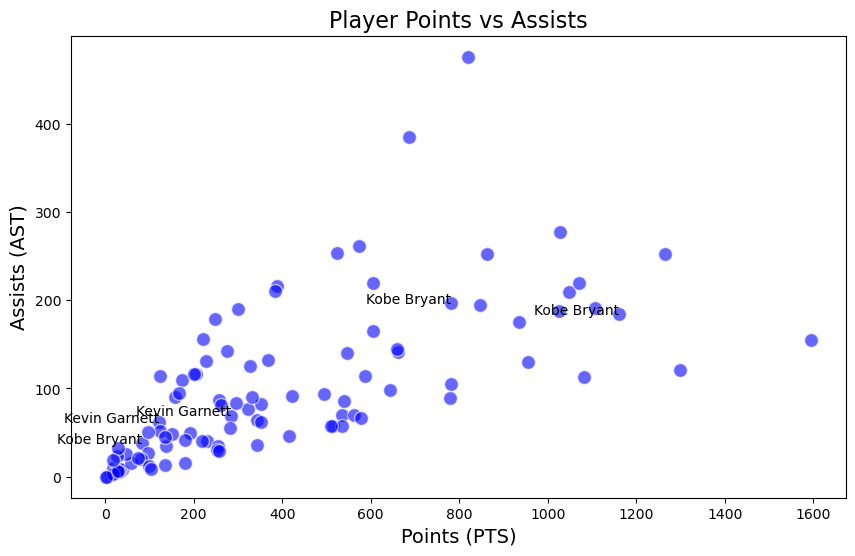

In [30]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player data (e.g., Player ID, Player Name, Points, Assists)
cur.execute('''
    SELECT "PLAYER_ID", "PLAYER_NAME", "PTS", "AST"
    FROM public."PlayerCareer_Stats"
    WHERE "PTS" IS NOT NULL AND "AST" IS NOT NULL
    LIMIT 100;  -- Optional: limit to the first 100 rows for performance
''')

# Fetch all results
players = cur.fetchall()

# Prepare data for plotting
player_ids = [player[0] for player in players]  # Player IDs (for reference if needed)
player_names = [player[1] for player in players]  # Player Names (optional)
points = [player[2] for player in players]  # Points (x-axis)
assists = [player[3] for player in players]  # Assists (y-axis)

# Close the cursor and the connection
cur.close()
conn.close()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(points, assists, color='blue', alpha=0.6, edgecolors='w', s=100)

# Add titles and labels
plt.title('Player Points vs Assists', fontsize=16)
plt.xlabel('Points (PTS)', fontsize=14)
plt.ylabel('Assists (AST)', fontsize=14)

# Optionally, annotate a few points (e.g., top 5 players)
for i in range(min(5, len(players))):  # Top 5 players (or fewer if there aren't enough)
    plt.annotate(player_names[i], (points[i], assists[i]), fontsize=10, ha='right')

# Display the plot
plt.show()


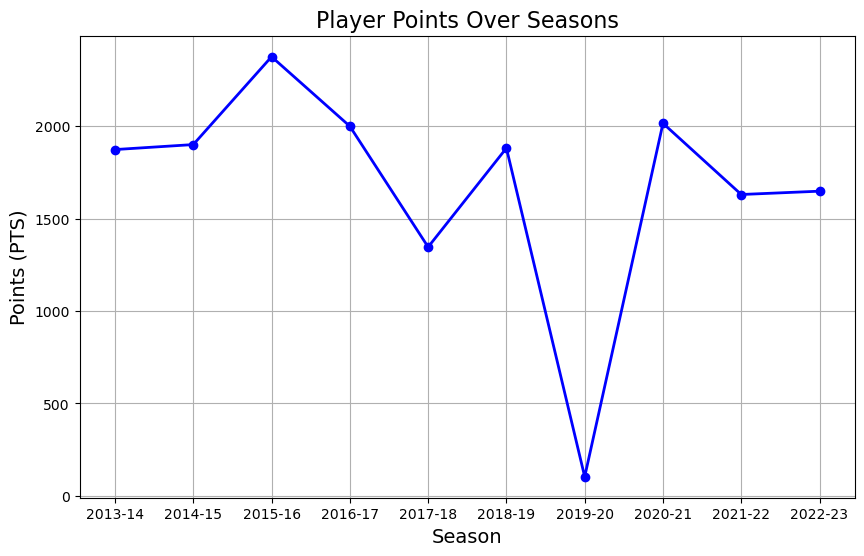

In [22]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career stats over seasons (e.g., Points over seasons)
# Replace "PLAYER_ID" with a specific player ID if needed, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "PTS", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Use the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    points = [record[1] for record in data]  # Extract points

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, points, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
    
    # Add titles and labels
    plt.title("Player Points Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("Points (PTS)", fontsize=14)

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")


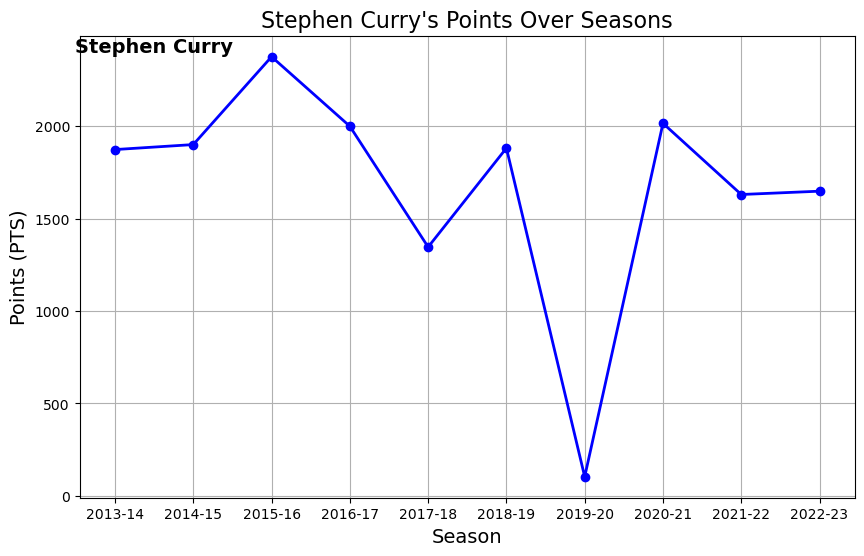

In [24]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career stats over seasons (e.g., Points over seasons)
# Replace "PLAYER_ID" with a specific player ID if needed, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "PTS", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Use the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    points = [record[1] for record in data]  # Extract points
    player_name = data[0][2]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, points, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
    
    # Add titles and labels
    plt.title(f"{player_name}'s Points Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("Points (PTS)", fontsize=14)

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(points) + 2, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")


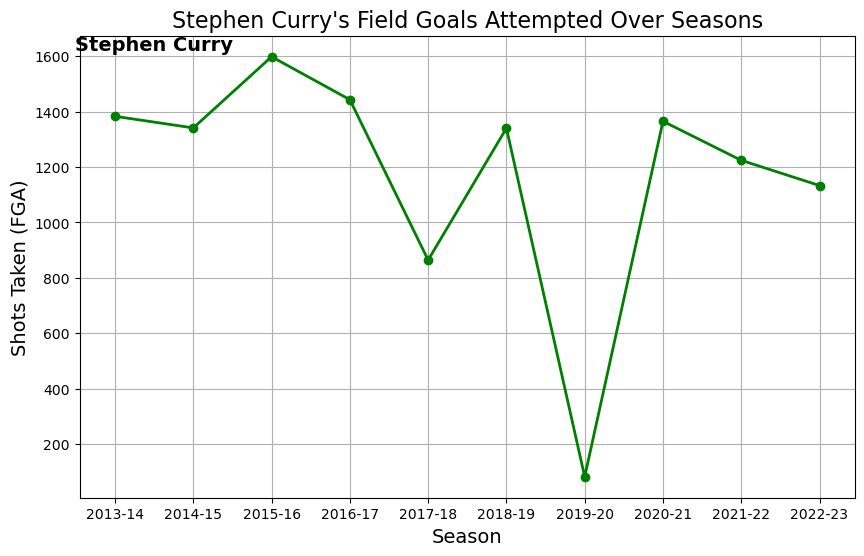

In [28]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career stats over seasons (e.g., Field Goals Attempted (FGA) over seasons)
# Replace "PLAYER_ID" with a specific player ID if needed, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "FGA", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Use the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    shots_taken = [record[1] for record in data]  # Extract field goals attempted (FGA)
    player_name = data[0][2]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the line chart with a color change (e.g., 'g' for green)
    plt.figure(figsize=(10, 6))
    plt.plot(seasons, shots_taken, marker='o', color='g', linestyle='-', linewidth=2, markersize=6)  # Green line
    
    # Add titles and labels
    plt.title(f"{player_name}'s Field Goals Attempted Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("Shots Taken (FGA)", fontsize=14)  # Update Y-axis label to "Shots Taken (FGA)"

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(shots_taken) + 10, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")


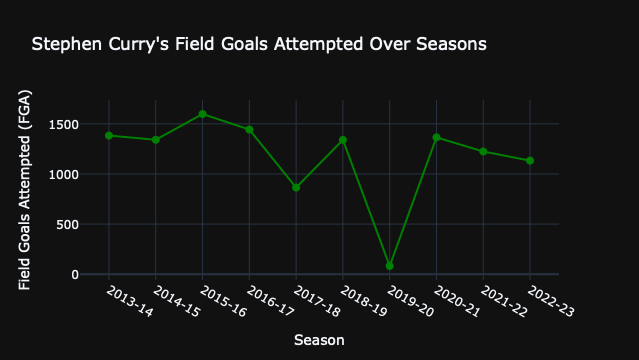

In [73]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career stats over seasons (e.g., Field Goals Attempted (FGA) over seasons)
cur.execute('''
    SELECT "SEASON_ID", "FGA", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Use the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    shots_taken = [record[1] for record in data]  # Extract field goals attempted (FGA)
    player_name = data[0][2]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the interactive line chart using Plotly
    fig = go.Figure()

    # Plot 3-point shots (FGA)
    fig.add_trace(go.Scatter(
        x=seasons,
        y=shots_taken,
        mode='lines+markers',  # Line chart with markers
        name=f"{player_name} - FGA",  # Name for the legend
        line=dict(color='green', width=2),  # Green line for FGA
        marker=dict(symbol='circle', size=8, color='green')  # Markers for FGA
    ))

    # Update layout for titles and labels
    fig.update_layout(
        title=f"{player_name}'s Field Goals Attempted Over Seasons",
        xaxis_title="Season",
        yaxis_title="Field Goals Attempted (FGA)",
        template="plotly_dark",  # Optional: Choose a theme
        legend_title="Field Goals Attempted",
        hovermode="closest"  # Show the nearest point info when hovering
    )

    # Show the interactive plot
    fig.show()

else:
    print("No data found for the player.")



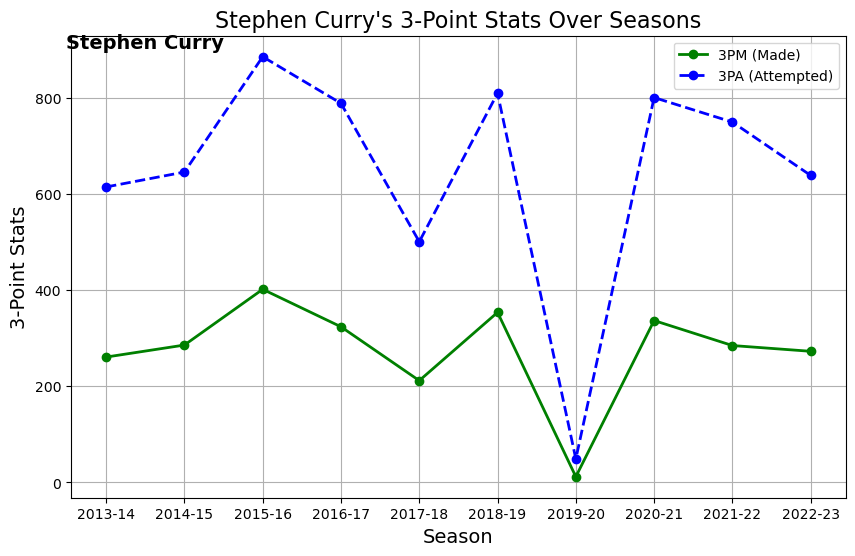

In [41]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats over seasons (3PM - 3 pointers made, 3PA - 3 point attempts)
# Replace "PLAYER_ID" with a specific player ID, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Replace with the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    three_points_made = [record[1] for record in data]  # Extract 3-pointers made
    three_point_attempts = [record[2] for record in data]  # Extract 3-point attempts
    player_name = data[0][3]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the line chart for both 3PM and 3PA
    plt.figure(figsize=(10, 6))

    # Plot 3-pointers made
    plt.plot(seasons, three_points_made, marker='o', color='g', linestyle='-', linewidth=2, markersize=6, label='3PM (Made)')

    # Plot 3-point attempts
    plt.plot(seasons, three_point_attempts, marker='o', color='b', linestyle='--', linewidth=2, markersize=6, label='3PA (Attempted)')

    # Add titles and labels
    plt.title(f"{player_name}'s 3-Point Stats Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Stats", fontsize=14)  # Update Y-axis label to "3-Point Stats"

    # Add a legend to differentiate between the two lines
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(three_point_attempts) + 10, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")



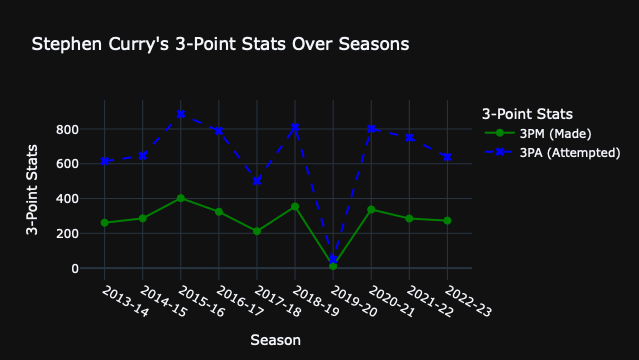

In [71]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats over seasons (3PM - 3 pointers made, 3PA - 3 point attempts)
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Replace with the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    three_points_made = [record[1] for record in data]  # Extract 3-pointers made
    three_point_attempts = [record[2] for record in data]  # Extract 3-point attempts
    player_name = data[0][3]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the interactive line chart using Plotly
    fig = go.Figure()

    # Plot 3-pointers made
    fig.add_trace(go.Scatter(
        x=seasons,
        y=three_points_made,
        mode='lines+markers',  # Line chart with markers
        name='3PM (Made)',  # Name for the legend
        line=dict(color='green', width=2),  # Green line for 3PM
        marker=dict(symbol='circle', size=8, color='green')  # Markers for 3PM
    ))

    # Plot 3-point attempts
    fig.add_trace(go.Scatter(
        x=seasons,
        y=three_point_attempts,
        mode='lines+markers',  # Line chart with markers
        name='3PA (Attempted)',  # Name for the legend
        line=dict(color='blue', width=2, dash='dash'),  # Blue dashed line for 3PA
        marker=dict(symbol='x', size=8, color='blue')  # Markers for 3PA
    ))

    # Update layout for titles and labels
    fig.update_layout(
        title=f"{player_name}'s 3-Point Stats Over Seasons",
        xaxis_title="Season",
        yaxis_title="3-Point Stats",
        template="plotly_dark",  # Optional: Choose a theme
        legend_title="3-Point Stats",
        hovermode="closest"  # Show the nearest point info when hovering
    )

    # Show the interactive plot
    fig.show()

else:
    print("No data found for the player.")



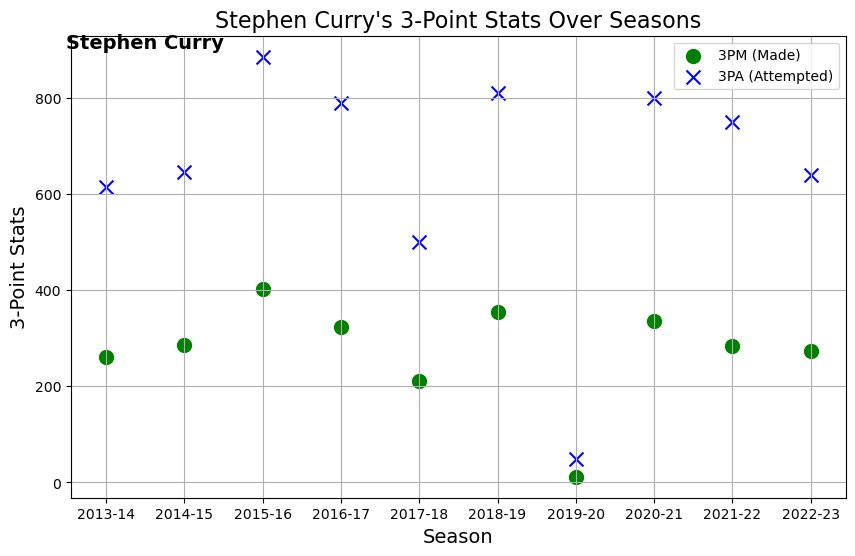

In [43]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats over seasons (3PM - 3 pointers made, 3PA - 3 point attempts)
# Replace "PLAYER_ID" with a specific player ID, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Replace with the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    three_points_made = [record[1] for record in data]  # Extract 3-pointers made
    three_point_attempts = [record[2] for record in data]  # Extract 3-point attempts
    player_name = data[0][3]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the scatter plot for both 3PM and 3PA
    plt.figure(figsize=(10, 6))

    # Scatter plot for 3-pointers made
    plt.scatter(seasons, three_points_made, color='g', s=100, label='3PM (Made)', marker='o')

    # Scatter plot for 3-point attempts
    plt.scatter(seasons, three_point_attempts, color='b', s=100, label='3PA (Attempted)', marker='x')

    # Add titles and labels
    plt.title(f"{player_name}'s 3-Point Stats Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Stats", fontsize=14)  # Update Y-axis label to "3-Point Stats"

    # Add a legend to differentiate between the two scatter plots
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(three_point_attempts) + 10, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")


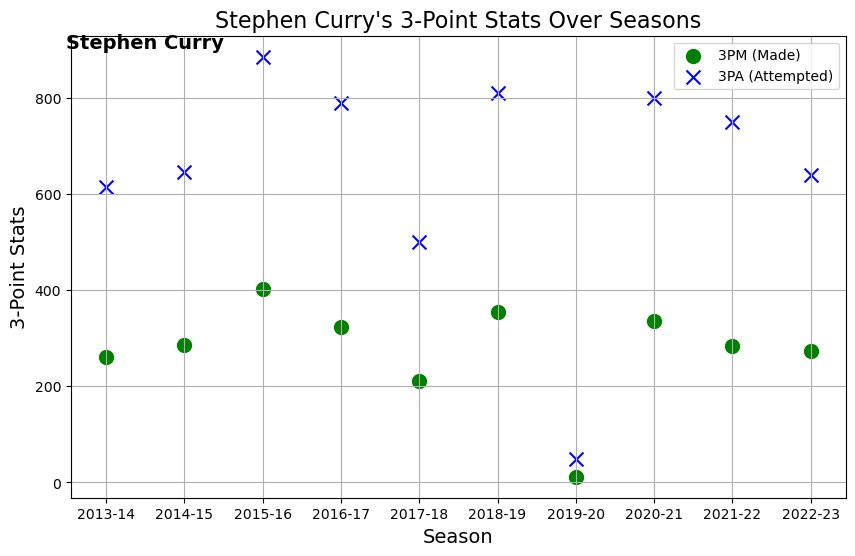

In [67]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats over seasons (3PM - 3 pointers made, 3PA - 3 point attempts)
# Replace "PLAYER_ID" with a specific player ID, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201939  -- Replace with the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    three_points_made = [record[1] for record in data]  # Extract 3-pointers made
    three_point_attempts = [record[2] for record in data]  # Extract 3-point attempts
    player_name = data[0][3]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the scatter plot for both 3PM and 3PA
    plt.figure(figsize=(10, 6))

    # Scatter plot for 3-pointers made
    plt.scatter(seasons, three_points_made, color='g', s=100, label='3PM (Made)', marker='o')

    # Scatter plot for 3-point attempts
    plt.scatter(seasons, three_point_attempts, color='b', s=100, label='3PA (Attempted)', marker='x')

    # Add titles and labels
    plt.title(f"{player_name}'s 3-Point Stats Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Stats", fontsize=14)  # Update Y-axis label to "3-Point Stats"

    # Add a legend to differentiate between the two scatter plots
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(three_point_attempts) + 10, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")


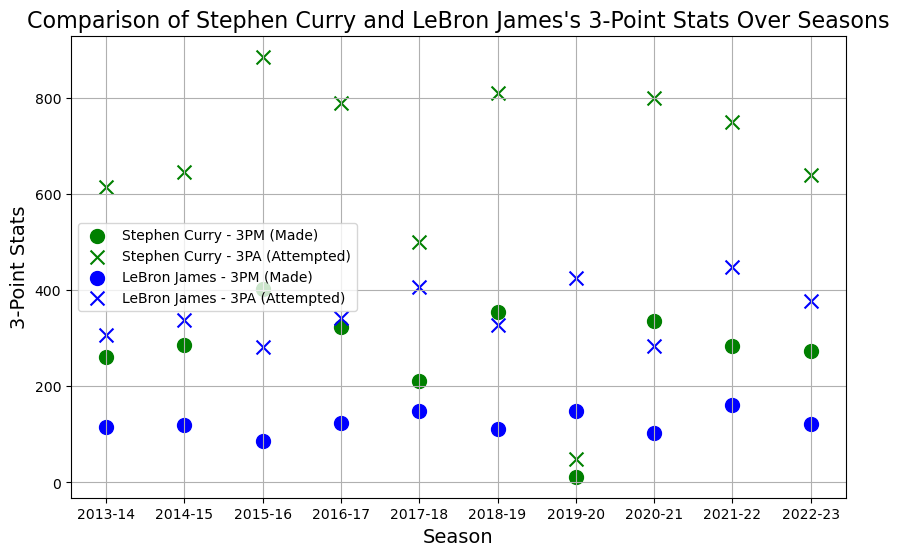

In [45]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats (3PM - 3 pointers made, 3PA - 3 point attempts)
# Replace PLAYER_IDs with the IDs of the two players you want to compare
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 2544)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PM = []
    player_1_3PA = []
    player_1_name = ""

    player_2_seasons = []
    player_2_3PM = []
    player_2_3PA = []
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[4] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PM.append(record[1])
            player_1_3PA.append(record[2])
            player_1_name = record[3]
        elif record[4] == 2544:  # Player 2 (e.g., Player ID 2544)
            player_2_seasons.append(record[0])
            player_2_3PM.append(record[1])
            player_2_3PA.append(record[2])
            player_2_name = record[3]

    # Create the scatter plot for comparing both players
    plt.figure(figsize=(10, 6))

    # Player 1 (green)
    plt.scatter(player_1_seasons, player_1_3PM, color='g', s=100, label=f'{player_1_name} - 3PM (Made)', marker='o')
    plt.scatter(player_1_seasons, player_1_3PA, color='g', s=100, label=f'{player_1_name} - 3PA (Attempted)', marker='x')

    # Player 2 (blue)
    plt.scatter(player_2_seasons, player_2_3PM, color='b', s=100, label=f'{player_2_name} - 3PM (Made)', marker='o')
    plt.scatter(player_2_seasons, player_2_3PA, color='b', s=100, label=f'{player_2_name} - 3PA (Attempted)', marker='x')

    # Add titles and labels
    plt.title(f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Stats Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Stats", fontsize=14)  # Update Y-axis label to "3-Point Stats"

    # Add a legend to differentiate between the two players
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

else:
    print("No data found for the players.")


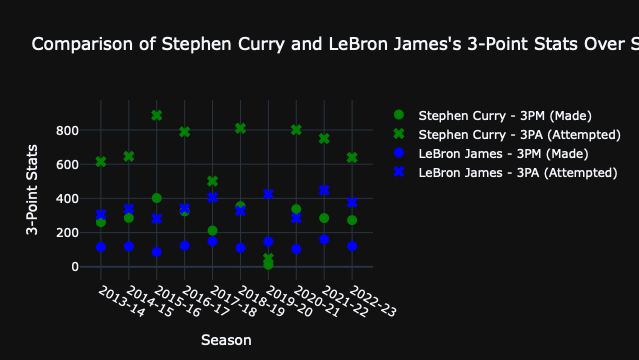

In [75]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats (3PM - 3 pointers made, 3PA - 3 point attempts)
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 2544)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PM = []
    player_1_3PA = []
    player_1_name = ""

    player_2_seasons = []
    player_2_3PM = []
    player_2_3PA = []
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[4] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PM.append(record[1])
            player_1_3PA.append(record[2])
            player_1_name = record[3]
        elif record[4] == 2544:  # Player 2 (e.g., Player ID 2544)
            player_2_seasons.append(record[0])
            player_2_3PM.append(record[1])
            player_2_3PA.append(record[2])
            player_2_name = record[3]

    # Create the interactive scatter plot using Plotly
    fig = go.Figure()

    # Player 1 (green)
    fig.add_trace(go.Scatter(
        x=player_1_seasons,
        y=player_1_3PM,
        mode='markers',  # Scatter plot (markers)
        name=f'{player_1_name} - 3PM (Made)',  # Name for the legend
        marker=dict(color='green', size=10, symbol='circle')  # Green markers for Player 1
    ))

    fig.add_trace(go.Scatter(
        x=player_1_seasons,
        y=player_1_3PA,
        mode='markers',  # Scatter plot (markers)
        name=f'{player_1_name} - 3PA (Attempted)',  # Name for the legend
        marker=dict(color='green', size=10, symbol='x')  # Green 'x' markers for Player 1
    ))

    # Player 2 (blue)
    fig.add_trace(go.Scatter(
        x=player_2_seasons,
        y=player_2_3PM,
        mode='markers',  # Scatter plot (markers)
        name=f'{player_2_name} - 3PM (Made)',  # Name for the legend
        marker=dict(color='blue', size=10, symbol='circle')  # Blue markers for Player 2
    ))

    fig.add_trace(go.Scatter(
        x=player_2_seasons,
        y=player_2_3PA,
        mode='markers',  # Scatter plot (markers)
        name=f'{player_2_name} - 3PA (Attempted)',  # Name for the legend
        marker=dict(color='blue', size=10, symbol='x')  # Blue 'x' markers for Player 2
    ))

    # Update layout for titles and labels
    fig.update_layout(
        title=f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Stats Over Seasons",
        xaxis_title="Season",
        yaxis_title="3-Point Stats",
        template="plotly_dark",  # Optional: Choose a theme
        hovermode="closest"  # Show the nearest point info when hovering
    )

    # Show the interactive plot
    fig.show()

else:
    print("No data found for the players.")



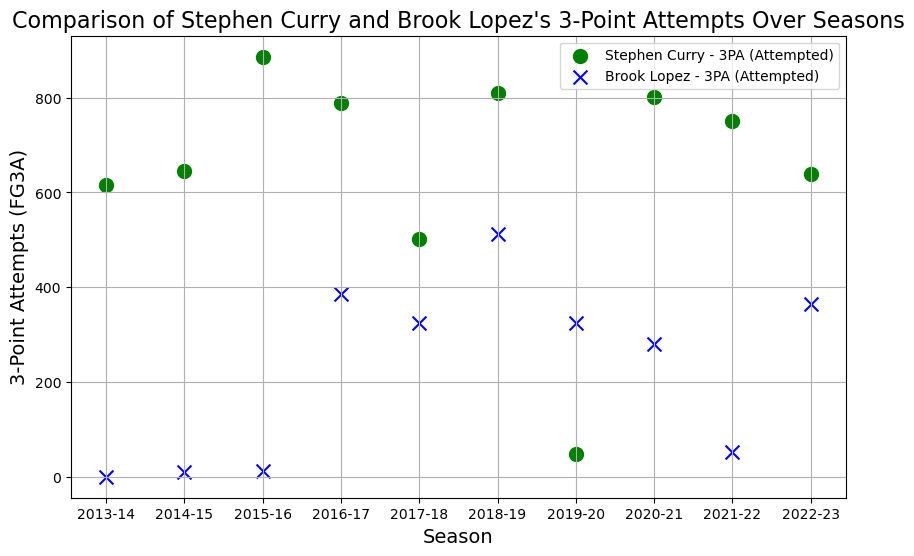

In [49]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point attempts (FG3A)
# Replace PLAYER_IDs with the IDs of the two players you want to compare
cur.execute('''
    SELECT "SEASON_ID", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 201572)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PA = []  # 3-point attempts (FG3A)
    player_1_name = ""

    player_2_seasons = []
    player_2_3PA = []  # 3-point attempts (FG3A)
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[3] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PA.append(record[1])  # Store 3-point attempts
            player_1_name = record[2]
        elif record[3] == 201572:  # Player 2 (e.g., Player ID 201572)
            player_2_seasons.append(record[0])
            player_2_3PA.append(record[1])  # Store 3-point attempts
            player_2_name = record[2]

    # Create the scatter plot for comparing both players' 3-point attempts (FG3A)
    plt.figure(figsize=(10, 6))

    # Player 1 (green)
    plt.scatter(player_1_seasons, player_1_3PA, color='g', s=100, label=f'{player_1_name} - 3PA (Attempted)', marker='o')

    # Player 2 (blue)
    plt.scatter(player_2_seasons, player_2_3PA, color='b', s=100, label=f'{player_2_name} - 3PA (Attempted)', marker='x')

    # Add titles and labels
    plt.title(f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Attempts Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Attempts (FG3A)", fontsize=14)  # Update Y-axis label to "3-Point Attempts"

    # Add a legend to differentiate between the two players
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

else:
    print("No data found for the players.")


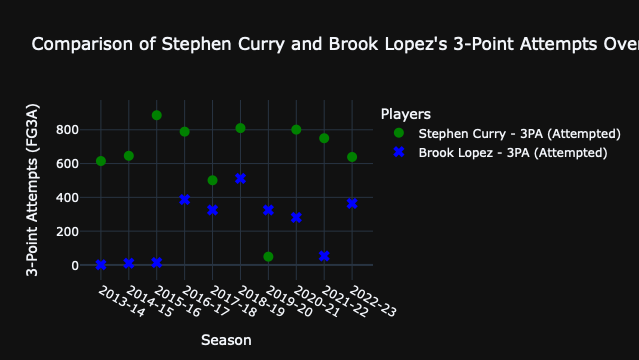

In [63]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point attempts (FG3A)
# Replace PLAYER_IDs with the IDs of the two players you want to compare
cur.execute('''
    SELECT "SEASON_ID", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 201572)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PA = []  # 3-point attempts (FG3A)
    player_1_name = ""

    player_2_seasons = []
    player_2_3PA = []  # 3-point attempts (FG3A)
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[3] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PA.append(record[1])  # Store 3-point attempts
            player_1_name = record[2]
        elif record[3] == 201572:  # Player 2 (e.g., Player ID 201572)
            player_2_seasons.append(record[0])
            player_2_3PA.append(record[1])  # Store 3-point attempts
            player_2_name = record[2]

    # Create the scatter plot for comparing both players' 3-point attempts (FG3A)
    fig = go.Figure()

    # Add Player 1's 3-point attempts as a scatter trace
    fig.add_trace(go.Scatter(
        x=player_1_seasons,
        y=player_1_3PA,
        mode='markers',  # Scatter plot with markers
        name=f'{player_1_name} - 3PA (Attempted)',
        marker=dict(color='green', size=10, symbol='circle')  # Green markers for Player 1
    ))

    # Add Player 2's 3-point attempts as a scatter trace
    fig.add_trace(go.Scatter(
        x=player_2_seasons,
        y=player_2_3PA,
        mode='markers',  # Scatter plot with markers
        name=f'{player_2_name} - 3PA (Attempted)',
        marker=dict(color='blue', size=10, symbol='x')  # Blue markers for Player 2
    ))

    # Add titles and labels
    fig.update_layout(
        title=f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Attempts Over Seasons",
        xaxis_title="Season",
        yaxis_title="3-Point Attempts (FG3A)",
        legend_title="Players",
        template="plotly_dark",  # Optional: Choose a theme
        hovermode="closest"  # Tooltip mode: display only the nearest points
    )

    # Show the plot
    fig.show()

else:
    print("No data found for the players.")


In [ ]:
201572 vs steph 3pts attempted scattered

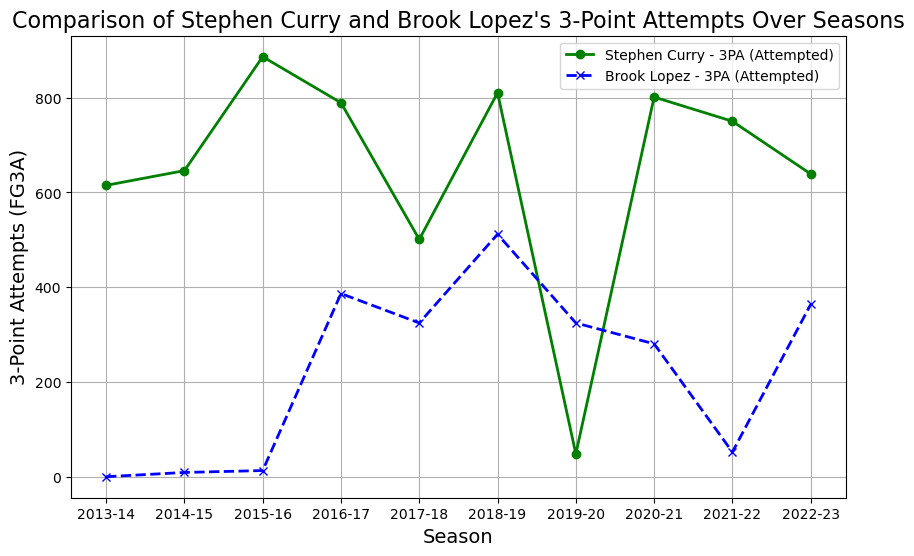

In [51]:
import psycopg2
import matplotlib.pyplot as plt

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point attempts (FG3A)
# Replace PLAYER_IDs with the IDs of the two players you want to compare
cur.execute('''
    SELECT "SEASON_ID", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 201572)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PA = []  # 3-point attempts (FG3A)
    player_1_name = ""

    player_2_seasons = []
    player_2_3PA = []  # 3-point attempts (FG3A)
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[3] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PA.append(record[1])  # Store 3-point attempts
            player_1_name = record[2]
        elif record[3] == 201572:  # Player 2 (e.g., Player ID 201572)
            player_2_seasons.append(record[0])
            player_2_3PA.append(record[1])  # Store 3-point attempts
            player_2_name = record[2]

    # Create the line chart for comparing both players' 3-point attempts (FG3A)
    plt.figure(figsize=(10, 6))

    # Player 1 (green line)
    plt.plot(player_1_seasons, player_1_3PA, color='g', marker='o', linestyle='-', linewidth=2, markersize=6, label=f'{player_1_name} - 3PA (Attempted)')

    # Player 2 (blue line)
    plt.plot(player_2_seasons, player_2_3PA, color='b', marker='x', linestyle='--', linewidth=2, markersize=6, label=f'{player_2_name} - 3PA (Attempted)')

    # Add titles and labels
    plt.title(f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Attempts Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Attempts (FG3A)", fontsize=14)  # Update Y-axis label to "3-Point Attempts"

    # Add a legend to differentiate between the two players
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

else:
    print("No data found for the players.")


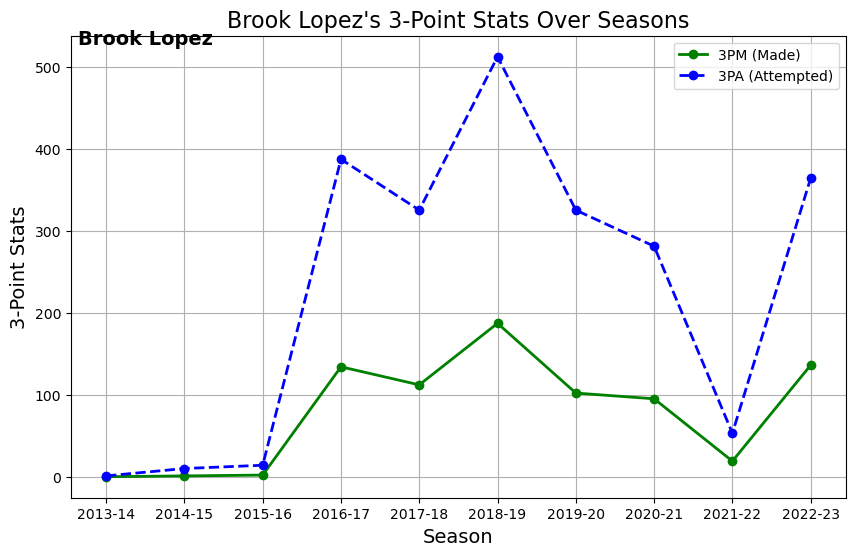

In [61]:

import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point stats over seasons (3PM - 3 pointers made, 3PA - 3 point attempts)
# Replace "PLAYER_ID" with a specific player ID, or use the first player for illustration
cur.execute('''
    SELECT "SEASON_ID", "FG3M", "FG3A", "PLAYER_NAME"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" = 201572  -- Replace with the specific player ID you want to plot
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Check if data exists for the player
if data:
    # Prepare the data for plotting
    seasons = [record[0] for record in data]  # Extract seasons
    three_points_made = [record[1] for record in data]  # Extract 3-pointers made
    three_point_attempts = [record[2] for record in data]  # Extract 3-point attempts
    player_name = data[0][3]  # Get the player's name from the first row of data

    # Close the cursor and the connection
    cur.close()
    conn.close()

    # Create the line chart for both 3PM and 3PA
    plt.figure(figsize=(10, 6))

    # Plot 3-pointers made
    plt.plot(seasons, three_points_made, marker='o', color='g', linestyle='-', linewidth=2, markersize=6, label='3PM (Made)')

    # Plot 3-point attempts
    plt.plot(seasons, three_point_attempts, marker='o', color='b', linestyle='--', linewidth=2, markersize=6, label='3PA (Attempted)')

    # Add titles and labels
    plt.title(f"{player_name}'s 3-Point Stats Over Seasons", fontsize=16)
    plt.xlabel("Season", fontsize=14)
    plt.ylabel("3-Point Stats", fontsize=14)  # Update Y-axis label to "3-Point Stats"

    # Add a legend to differentiate between the two lines
    plt.legend()

    # Optionally, add gridlines for better readability
    plt.grid(True)

    # Add player's name at the top of the chart (adjust x and y positions as needed)
    plt.text(0.5, max(three_point_attempts) + 10, f'{player_name}', ha='center', va='bottom', fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()
else:
    print("No data found for the player.")







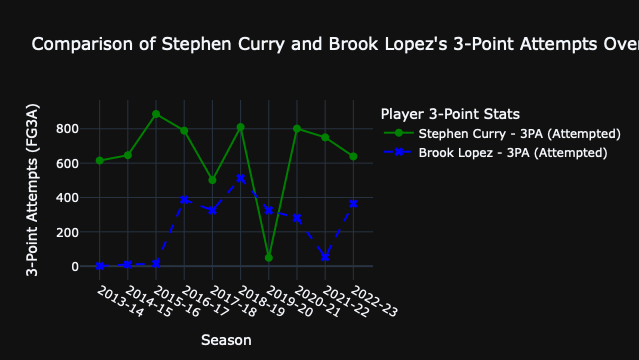

In [57]:
import psycopg2
import plotly.graph_objects as go

# Connect to the PostgreSQL database
conn = psycopg2.connect(
    dbname="nba_stats",  # Ensure this is the correct database
    user="postgres",
    password="Sebesta7",
    host="localhost",
    port="5432"
)

# Create a cursor object
cur = conn.cursor()

# Query to get player career 3-point attempts (FG3A)
# Replace PLAYER_IDs with the IDs of the two players you want to compare
cur.execute('''
    SELECT "SEASON_ID", "FG3A", "PLAYER_NAME", "PLAYER_ID"
    FROM public."PlayerCareer_Stats"
    WHERE "PLAYER_ID" IN (201939, 201572)  -- Replace with the two player IDs you want to compare
    ORDER BY "SEASON_ID";  -- Ensure seasons are in order
''')

# Fetch all results
data = cur.fetchall()

# Close the cursor and the connection
cur.close()
conn.close()

# Check if data exists for the players
if data:
    # Prepare data dictionaries to hold player stats
    player_1_seasons = []
    player_1_3PA = []  # 3-point attempts (FG3A)
    player_1_name = ""

    player_2_seasons = []
    player_2_3PA = []  # 3-point attempts (FG3A)
    player_2_name = ""

    # Split data by player ID
    for record in data:
        if record[3] == 201939:  # Player 1 (e.g., Player ID 201939)
            player_1_seasons.append(record[0])
            player_1_3PA.append(record[1])  # Store 3-point attempts
            player_1_name = record[2]
        elif record[3] == 201572:  # Player 2 (e.g., Player ID 201572)
            player_2_seasons.append(record[0])
            player_2_3PA.append(record[1])  # Store 3-point attempts
            player_2_name = record[2]

    # Create an interactive line chart for comparing both players' 3-point attempts (FG3A)
    fig = go.Figure()

    # Add Player 1's 3-point attempts as a line trace
    fig.add_trace(go.Scatter(
        x=player_1_seasons,
        y=player_1_3PA,
        mode='lines+markers',  # Line with markers
        name=f'{player_1_name} - 3PA (Attempted)',
        line=dict(color='green', width=2),  # Green line
        marker=dict(symbol='circle', size=8)  # Circular markers
    ))

    # Add Player 2's 3-point attempts as a line trace
    fig.add_trace(go.Scatter(git pull
        y=player_2_3PA,
        mode='lines+markers',  # Line with markers
        name=f'{player_2_name} - 3PA (Attempted)',
        line=dict(color='blue', width=2, dash='dash'),  # Dashed blue line
        marker=dict(symbol='x', size=8)  # 'x' markers
    ))

    # Add titles and labels
    fig.update_layout(
        title=f"Comparison of {player_1_name} and {player_2_name}'s 3-Point Attempts Over Seasons",
        xaxis_title="Season",
        yaxis_title="3-Point Attempts (FG3A)",
        legend_title="Player 3-Point Stats",
        template="plotly_dark",  # Dark theme, can be customized
    )

    # Show the plot
    fig.show()

else:
    print("No data found for the players.")
